# Xtern Work Sample Assessment

## Submitted by: Gunveen Kaur Batra

### Task description

Given the launch of our food truck line, FoodX, we will be running an exciting and interactive promotion on college campuses to attract a massive initial student following.  When placing their order on our fancy new FoodX app they input basic information about their college experience and we predict what they are going to order.  If we don’t get it right they get a 10% discount.

While the promotion has done a great job of bringing in business our staff has not been great at guessing orders and are not happy with the combined workload of guessing and cooking.

Because of this you have been asked to consider implications, solutions and deployment of a mechanism to automatically guess orders, sounds like the perfect job for AI!

In [471]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [472]:
df_orders = pd.read_excel('ai_dataset.xlsx', sheet_name='Xtern_TrainData')
df_menu = pd.read_excel('ai_dataset.xlsx', sheet_name='Menu')

In [473]:
df_orders.head()

,Year,Major,University,Time,Order
0,Year 2,Physics,Indiana State University,12,Fried Catfish Basket
1,Year 3,Chemistry,Ball State University,14,Sugar Cream Pie
2,Year 3,Chemistry,Butler University,12,Indiana Pork Chili
3,Year 2,Biology,Indiana State University,11,Fried Catfish Basket
4,Year 3,Business Administration,Butler University,12,Indiana Corn on the Cob (brushed with garlic b...


In [474]:
df_menu.head()

,Unnamed: 0,Item,Price,Calories
0,0,Hoosier BBQ Pulled Pork Sandwich,8,400
1,1,Cornbread Hush Puppies,5,250
2,2,Breaded Pork Tenderloin Sandwich,9,550
3,3,Indiana Pork Chili,7,300
4,4,Fried Catfish Basket,10,600


In [475]:
df_orders.shape, df_menu.shape

((5000, 5), (10, 4))

In [476]:
df_orders.dropna(inplace=True)
df_orders.shape

(5000, 5)

In [477]:
df_orders.columns

Index(['Year', 'Major', 'University', 'Time', 'Order'], dtype='object')

In [478]:
bold = '\033[1m'
reset = '\033[0m'
def get_information(column):
    print(bold + column + reset + '\n')
    print(df_orders[column].describe())
    print('__________________________________________________________________')
    print(df_orders[column].info())
    print('__________________________________________________________________')
    print(df_orders[column].value_counts())
    print('\n/////////////////////////////////////////////////////////////////////////////////////////\n')

for col in df_orders.columns:
    get_information(col)

Year

count       5000
unique         4
top       Year 3
freq        2719
Name: Year, dtype: object
__________________________________________________________________
<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Year
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
None
__________________________________________________________________
Year
Year 3    2719
Year 2    2273
Year 1       5
Year 4       3
Name: count, dtype: int64

/////////////////////////////////////////////////////////////////////////////////////////

Major

count          5000
unique           20
top       Chemistry
freq            640
Name: Major, dtype: object
__________________________________________________________________
<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Major
Non-Null Count  Dtype 
--------------  ----- 
5000 non-null   object
dtypes: object(1)
memory usage: 39.2+

Important points to note from above analysis,

- The data captured spans over 4 years with the highest being captured in year 3. 
- We are studying 

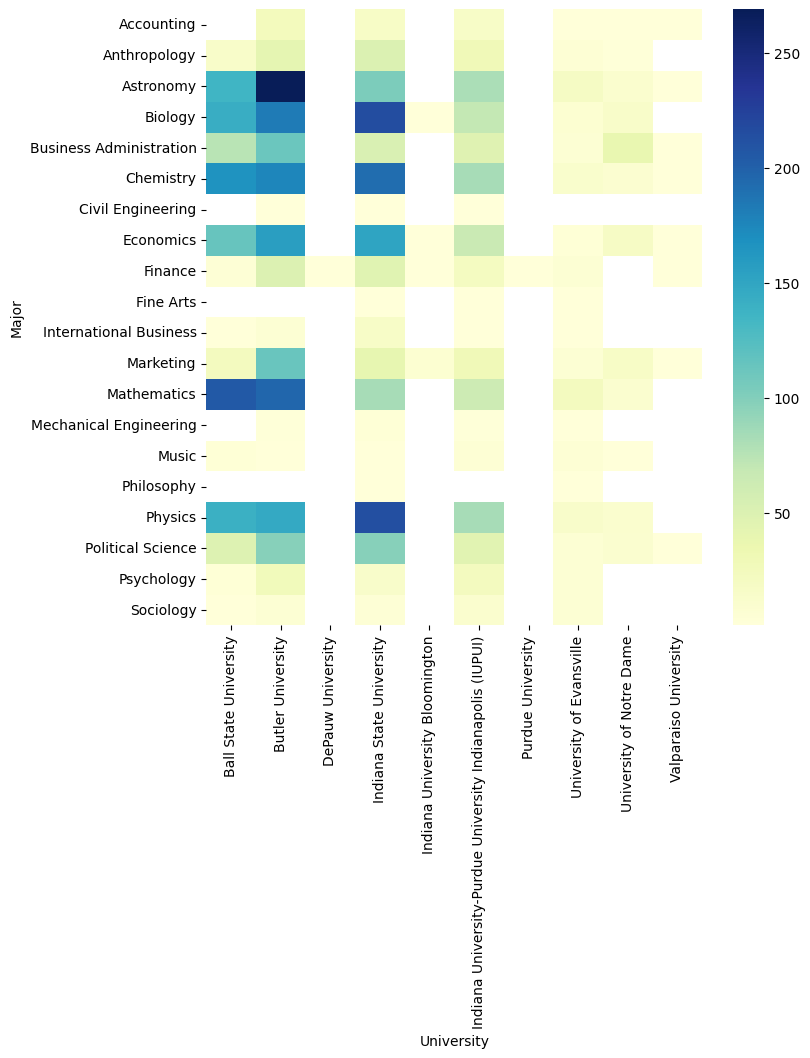

In [479]:
data_uni_major_orders = pd.DataFrame({'Major':df_orders['Major'],
                                      'University':df_orders['University'],
                                      'Value':df_orders['Order']})
grouped = data_uni_major_orders.groupby(['Major','University'])['Value'].count().unstack()
plt.figure(figsize=(8, 8))
sns.heatmap(grouped, cmap='YlGnBu')
plt.xlabel('University')
plt.ylabel('Major')
plt.show()

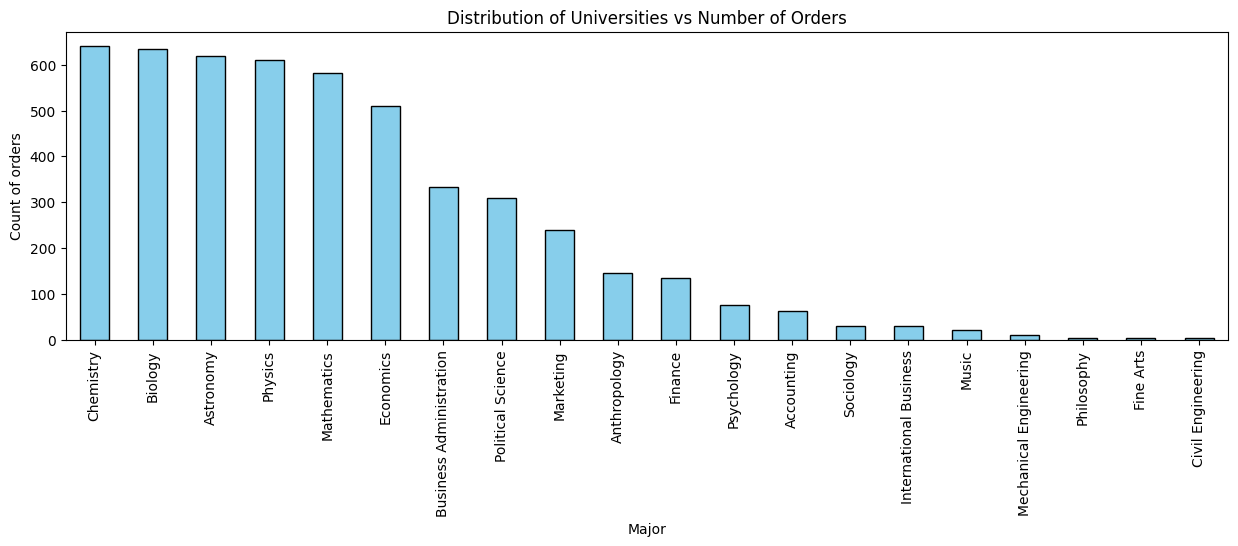

In [480]:
#Orders from each major

plt.figure(figsize=(15, 4))
df_orders['Major'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribution of Universities vs Number of Orders")
plt.xlabel("Major")
plt.ylabel("Count of orders")

plt.xticks(rotation=90)
plt.show()

In [481]:
# Encode categorical variables (Major and University)
le_major = LabelEncoder()
df_orders['Major'] = le_major.fit_transform(df_orders['Major'])
le_university = LabelEncoder()
df_orders['University'] = le_university.fit_transform(df_orders['University'])
le_year = LabelEncoder()
df_orders['Year'] = le_major.fit_transform(df_orders['Year'])
le_order = LabelEncoder()
df_orders['Order'] = le_order.fit_transform(df_orders['Order'])

df_orders = shuffle(df_orders)

X = df_orders[['Year', 'Major', 'University']]
y = df_orders['Order']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [482]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_cols = ['Year', 'Major', 'University']
df_orders = pd.get_dummies(df_orders, columns=categorical_cols, prefix=categorical_cols, drop_first=True)

X = df_orders.drop(columns=['Order'])
y = df_orders['Order']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train['Time'] = scaler.fit_transform(X_train[['Time']])
X_test['Time'] = scaler.transform(X_test[['Time']])

In [483]:
from sklearn.ensemble import RandomForestClassifier

def train_model(X_train, y_train):
    # Initialize the Random Forest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    return model


In [484]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you've already prepared the data using the prepare_data function

# Create and train the Support Vector Classifier
def train_svc_classifier(X_train, y_train):
    model = SVC(kernel='rbf', random_state=42)  # Radial basis function (RBF) kernel
    model.fit(X_train, y_train)
    return model

# Train the model
svc_classifier = train_svc_classifier(X_train, y_train)

# Evaluate the model
def evaluate_svc_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion

accuracy, report, confusion = evaluate_svc_classifier(svc_classifier, X_test, y_test)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.645
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.51      0.61        94
           1       0.53      0.60      0.57        96
           2       0.69      0.58      0.63        99
           3       0.75      0.58      0.66       105
           4       0.60      0.46      0.52       106
           5       0.76      0.86      0.81       107
           6       0.72      0.88      0.79       105
           7       0.51      0.68      0.58        95
           8       0.58      0.52      0.55        90
           9       0.62      0.74      0.67       103

    accuracy                           0.65      1000
   macro avg       0.65      0.64      0.64      1000
weighted avg       0.65      0.65      0.64      1000

Confusion Matrix:
 [[48  3  4  0  2  9 12  2  1 13]
 [ 2 58  4  2 11 12  1  4  1  1]
 [ 3 11 57  2  2  2  6  1 10  5]
 [ 0  1  0 61  8  0  0 21 13  1]
 [ 1 12  1  6 49  3  2 10  4 18]
 [ 1  3  0  0  0 

In [485]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you've already prepared the data using the prepare_data function

# Create and train the MLP classifier
def train_mlp_classifier(X_train, y_train):
    model = MLPClassifier(hidden_layer_sizes=(100, 75, 30), max_iter=400, random_state=42)
    model.fit(X_train, y_train)
    return model

# Train the model
mlp_classifier = train_mlp_classifier(X_train, y_train)

# Evaluate the model
def evaluate_mlp_classifier(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    return accuracy, report, confusion

accuracy, report, confusion = evaluate_mlp_classifier(mlp_classifier, X_test, y_test)

# Print evaluation results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", confusion)


Accuracy: 0.662
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.63        94
           1       0.55      0.62      0.59        96
           2       0.70      0.58      0.63        99
           3       0.62      0.80      0.70       105
           4       0.64      0.43      0.52       106
           5       0.75      0.85      0.80       107
           6       0.75      0.85      0.80       105
           7       0.62      0.56      0.59        95
           8       0.60      0.52      0.56        90
           9       0.67      0.78      0.72       103

    accuracy                           0.66      1000
   macro avg       0.66      0.66      0.65      1000
weighted avg       0.66      0.66      0.66      1000

Confusion Matrix:
 [[55  3  4  1  3  9  8  1  1  9]
 [ 4 60  3  3 11  9  0  3  2  1]
 [ 3 11 57  4  1  2  6  0 10  5]
 [ 0  1  0 84  3  0  0  8  8  1]
 [ 2 13  2 10 46  3  3  8  2 17]
 [ 6  3  0  0  1 